In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
import pickle
import matplotlib.pyplot as plt

In [35]:
!ls ../Data

benchpress  deadlift    merge.ipynb squat


In [36]:
bp_df = pd.read_csv('../Data/benchpress/benchpress_with_scaled_angles.csv')
dl_df = pd.read_csv('../Data/deadlift/deadlift_with_scaled_angles.csv')
sq_df = pd.read_csv('../Data/squat/squat_with_scaled_angles.csv')

## Benchpress

In [37]:
X = bp_df.drop('class', axis=1)
y = bp_df['class']

In [38]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

In [39]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, verbose=1)),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier(verbose=1)),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier(verbose=1)),
}

In [44]:
fit_models = {}
for algorithm, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algorithm] = model

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          864     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.79176D+00    |proj g|=  2.45832D-01

At iterate   50    f=  1.28249D-01    |proj g|=  1.18849D-03

At iterate  100    f=  1.26298D-01    |proj g|=  4.15960D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  864    132    138      1     0     0   9.425D-05   1.260D-01
  F =  0.12603387815878261     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


      Iter       Train Loss   Remaining Time 
         1           1.4068           14.66s
         2           1.1577           14.09s
         3           0.9865           13.75s
         4           0.8324           13.49s
         5           0.7093           13.24s
         6           0.6054           13.02s
         7           0.5262           12.79s
         8           0.4617           12.62s
         9           0.4021           12.43s
        10           0.3512           12.26s
        20           0.1022           10.80s
        30           0.0370            9.48s
        40           0.0158            8.15s
        50           0.0078            6.78s
        60           0.0039            5.43s
        70           0.0021            4.09s
        80           0.0011            2.73s
        90           0.0006            1.36s
       100           0.0003            0.00s


In [33]:
fit_models

{'lr': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(max_iter=1000, verbose=1))]),
 'rc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier(verbose=1))]),
 'gb': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier',
                  GradientBoostingClassifier(verbose=1))])}

In [21]:
fit_models['lr'].predict(X_test)

array(['b_arms_spread_down', 'b_excessive_arch_down', 'b_arms_spread_up',
       'b_correct_down', 'b_excessive_arch_down', 'b_arms_spread_down',
       'b_excessive_arch_down', 'b_arms_spread_up', 'b_arms_spread_up',
       'b_excessive_arch_up', 'b_arms_spread_up', 'b_arms_spread_down',
       'b_arms_spread_up', 'b_correct_down', 'b_arms_spread_up',
       'b_arms_spread_up', 'b_arms_spread_up', 'b_excessive_arch_up',
       'b_correct_down', 'b_excessive_arch_down', 'b_excessive_arch_down',
       'b_excessive_arch_down', 'b_excessive_arch_up',
       'b_excessive_arch_up', 'b_correct_down', 'b_excessive_arch_down',
       'b_arms_spread_down', 'b_excessive_arch_down', 'b_correct_up',
       'b_excessive_arch_up', 'b_arms_spread_down', 'b_correct_down',
       'b_excessive_arch_down', 'b_correct_up', 'b_arms_spread_down',
       'b_correct_up', 'b_correct_down', 'b_correct_down',
       'b_excessive_arch_down', 'b_arms_spread_up',
       'b_excessive_arch_down', 'b_excessive_arch_u

In [10]:
from sklearn.metrics import classification_report

predictions = {}

for algorithm, model in fit_models.items():
    y_pred = model.predict(X_test)
    predictions[algorithm] = y_pred 

for algorithm, y_pred in predictions.items():
    print(f'--- {algorithm} ---')
    print(classification_report(y_test, y_pred))
    print()

--- lr ---
                       precision    recall  f1-score   support

   b_arms_spread_down       0.93      0.92      0.92        60
     b_arms_spread_up       0.89      0.94      0.91        51
       b_correct_down       1.00      0.96      0.98        48
         b_correct_up       1.00      0.97      0.99        37
b_excessive_arch_down       0.98      0.96      0.97        51
  b_excessive_arch_up       0.95      1.00      0.98        40

             accuracy                           0.95       287
            macro avg       0.96      0.96      0.96       287
         weighted avg       0.96      0.95      0.95       287


--- rc ---
                       precision    recall  f1-score   support

   b_arms_spread_down       0.93      0.95      0.94        60
     b_arms_spread_up       0.92      0.90      0.91        51
       b_correct_down       1.00      0.94      0.97        48
         b_correct_up       0.95      0.97      0.96        37
b_excessive_arch_down       

In [25]:
metrics = {
    'accuracy': {},
    'precision': {},
    'recall': {},
    'f1-score': {}
}

for algorithm, y_pred in predictions.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    metrics['accuracy'][algorithm] = accuracy
    metrics['precision'][algorithm] = precision
    metrics['recall'][algorithm] = recall
    metrics['f1-score'][algorithm] = f1

for metric, values in metrics.items():
    print(f'--- {metric} ---')
    for algorithm, score in values.items():
        print(f'{algorithm}: {score:.4f}')

--- accuracy ---
lr: 0.9547
rc: 0.9477
rf: 0.9582
gb: 0.9477
--- precision ---
lr: 0.9559
rc: 0.9490
rf: 0.9594
gb: 0.9486
--- recall ---
lr: 0.9547
rc: 0.9477
rf: 0.9582
gb: 0.9477
--- f1-score ---
lr: 0.9550
rc: 0.9478
rf: 0.9582
gb: 0.9476


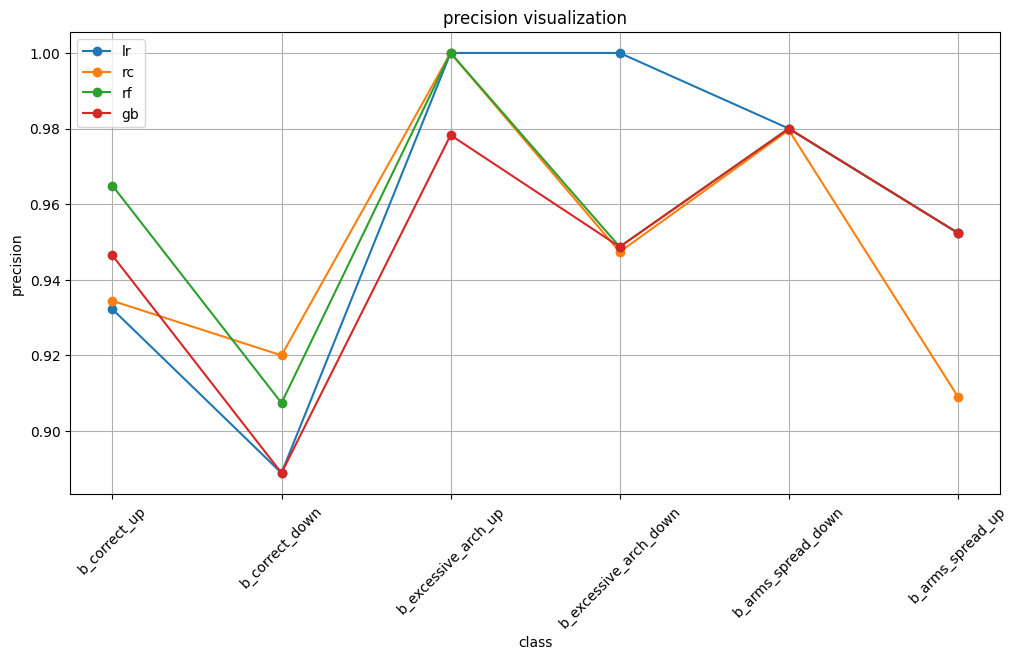

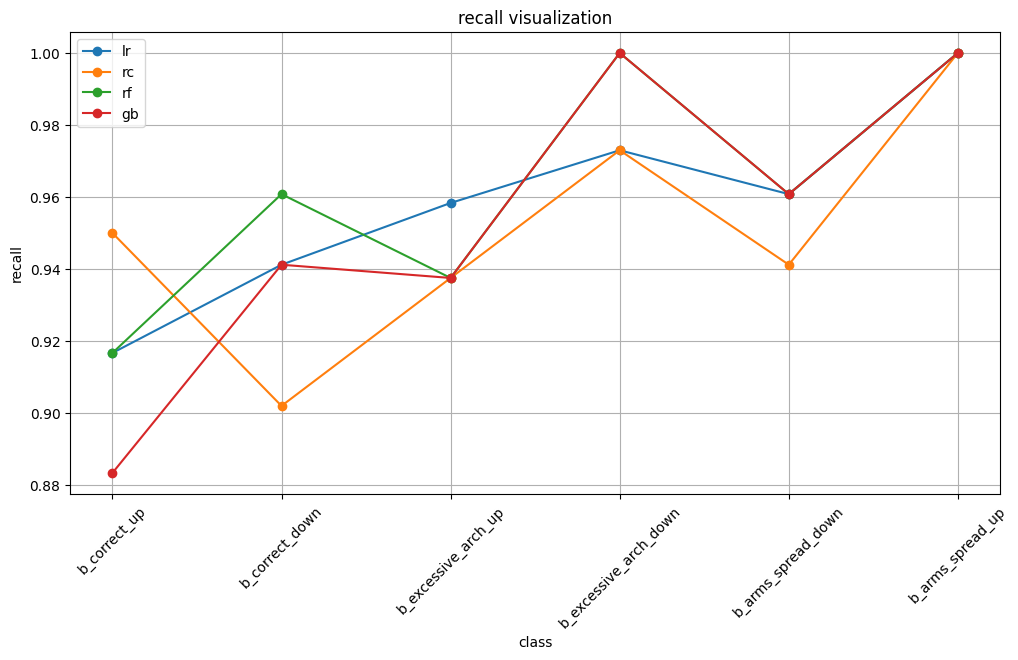

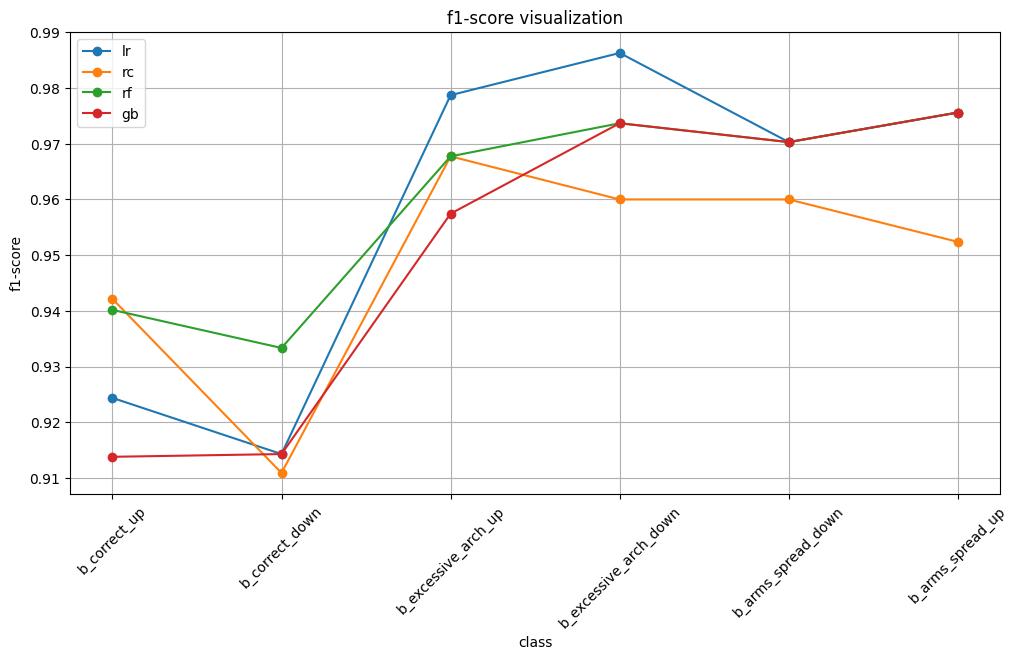

In [26]:
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

predictions = {}

for algorithm, model in fit_models.items():
    y_pred = model.predict(X_test)
    predictions[algorithm] = y_pred

metrics = ['precision', 'recall', 'f1-score']

for metric in metrics:
    plt.figure(figsize=(12, 6))
    plt.title(f'{metric} visualization')

    for algorithm, y_pred in predictions.items():
        report = classification_report(y_test, y_pred, output_dict=True)
        metric_score = [report[label][metric] for label in report if label not in ['accuracy', 'macro avg', 'weighted avg']]
        plt.plot(bp_df['class'].unique(), metric_score, label=algorithm, marker='o', linestyle='-')

    plt.xlabel('class')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

In [27]:
with open('./benchpress/benchpress_angles.pkl', 'wb') as f:
    pickle.dump(fit_models['rf'], f)

## Deadlift

In [28]:
X = dl_df.drop('class', axis=1)
y = dl_df['class']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}

In [31]:
fit_models = {}
for algorithm, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algorithm] = model

In [32]:
fit_models

{'lr': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression(max_iter=1000))]),
 'rc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'gb': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier', GradientBoostingClassifier())])}

In [33]:
fit_models['rc'].predict(X_test)

array(['d_correct_down', 'd_arms_spread_up', 'd_correct_up',
       'd_correct_down', 'd_spine_neutral_down', 'd_spine_neutral_up',
       'd_correct_up', 'd_correct_up', 'd_correct_down',
       'd_arms_narrow_up', 'd_arms_spread_down', 'd_spine_neutral_down',
       'd_correct_up', 'd_correct_up', 'd_correct_down',
       'd_arms_spread_up', 'd_arms_narrow_down', 'd_spine_neutral_up',
       'd_spine_neutral_up', 'd_arms_narrow_up', 'd_spine_neutral_up',
       'd_arms_narrow_down', 'd_arms_narrow_down', 'd_arms_spread_down',
       'd_arms_spread_up', 'd_correct_down', 'd_arms_spread_down',
       'd_correct_up', 'd_arms_narrow_up', 'd_spine_neutral_down',
       'd_spine_neutral_down', 'd_correct_down', 'd_correct_up',
       'd_correct_up', 'd_spine_neutral_down', 'd_correct_down',
       'd_correct_up', 'd_correct_up', 'd_arms_narrow_up',
       'd_correct_down', 'd_arms_narrow_up', 'd_arms_spread_up',
       'd_arms_spread_up', 'd_arms_spread_down', 'd_arms_narrow_down',
       

In [34]:
from sklearn.metrics import classification_report

predictions = {}

for algorithm, model in fit_models.items():
    y_pred = model.predict(X_test)
    predictions[algorithm] = y_pred 

for algorithm, y_pred in predictions.items():
    print(f'--- {algorithm} ---')
    print(classification_report(y_test, y_pred))
    print()

--- lr ---
                      precision    recall  f1-score   support

  d_arms_narrow_down       0.95      0.95      0.95        40
    d_arms_narrow_up       0.87      0.89      0.88        44
  d_arms_spread_down       1.00      1.00      1.00        38
    d_arms_spread_up       0.88      0.91      0.89        32
      d_correct_down       0.97      0.94      0.96        35
        d_correct_up       0.96      0.86      0.91        57
d_spine_neutral_down       0.88      1.00      0.94        44
  d_spine_neutral_up       0.82      0.81      0.82        52

            accuracy                           0.91       342
           macro avg       0.92      0.92      0.92       342
        weighted avg       0.91      0.91      0.91       342


--- rc ---
                      precision    recall  f1-score   support

  d_arms_narrow_down       0.95      0.93      0.94        40
    d_arms_narrow_up       0.79      0.86      0.83        44
  d_arms_spread_down       0.90      1.00  

In [35]:
metrics = {
    'accuracy': {},
    'precision': {},
    'recall': {},
    'f1-score': {}
}

for algorithm, y_pred in predictions.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    metrics['accuracy'][algorithm] = accuracy
    metrics['precision'][algorithm] = precision
    metrics['recall'][algorithm] = recall
    metrics['f1-score'][algorithm] = f1

for metric, values in metrics.items():
    print(f'--- {metric} ---')
    for algorithm, score in values.items():
        print(f'{algorithm}: {score:.4f}')

--- accuracy ---
lr: 0.9123
rc: 0.8801
rf: 0.9561
gb: 0.9503
--- precision ---
lr: 0.9138
rc: 0.8816
rf: 0.9573
gb: 0.9527
--- recall ---
lr: 0.9123
rc: 0.8801
rf: 0.9561
gb: 0.9503
--- f1-score ---
lr: 0.9120
rc: 0.8787
rf: 0.9562
gb: 0.9503


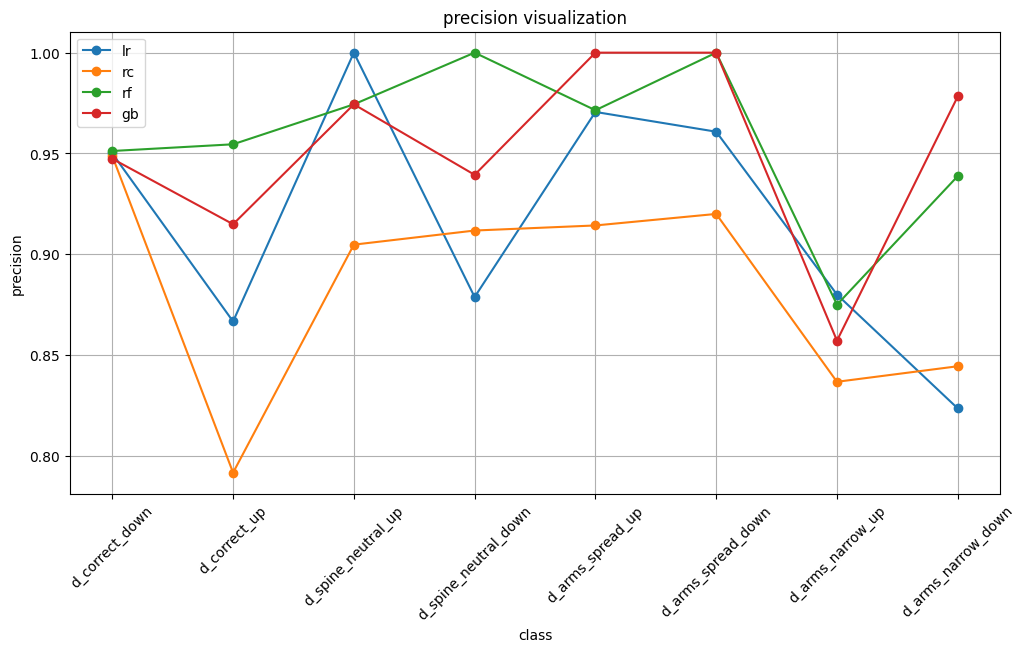

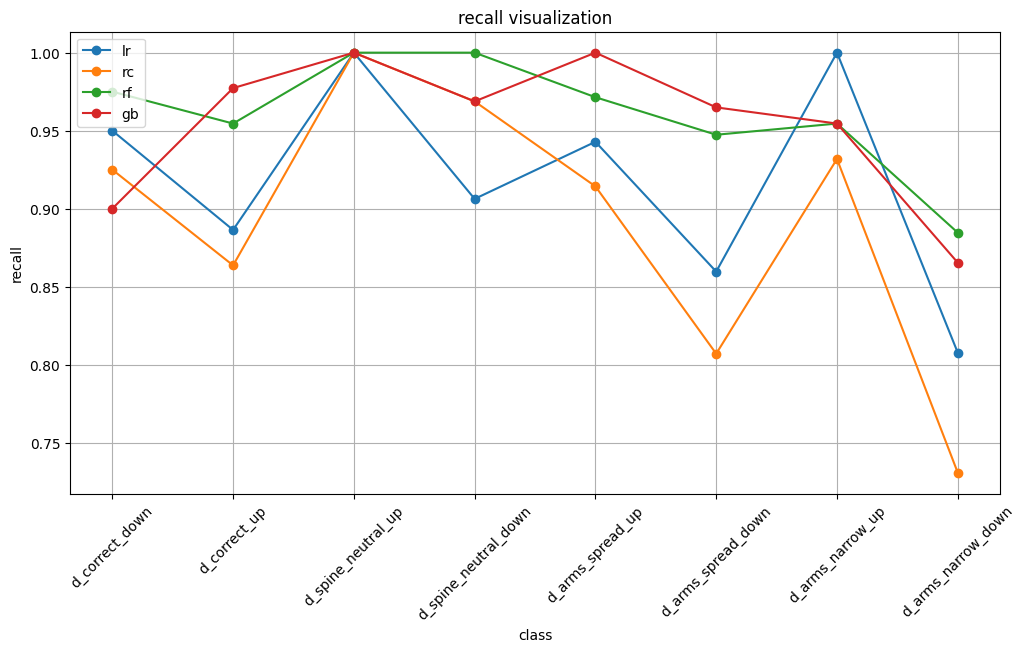

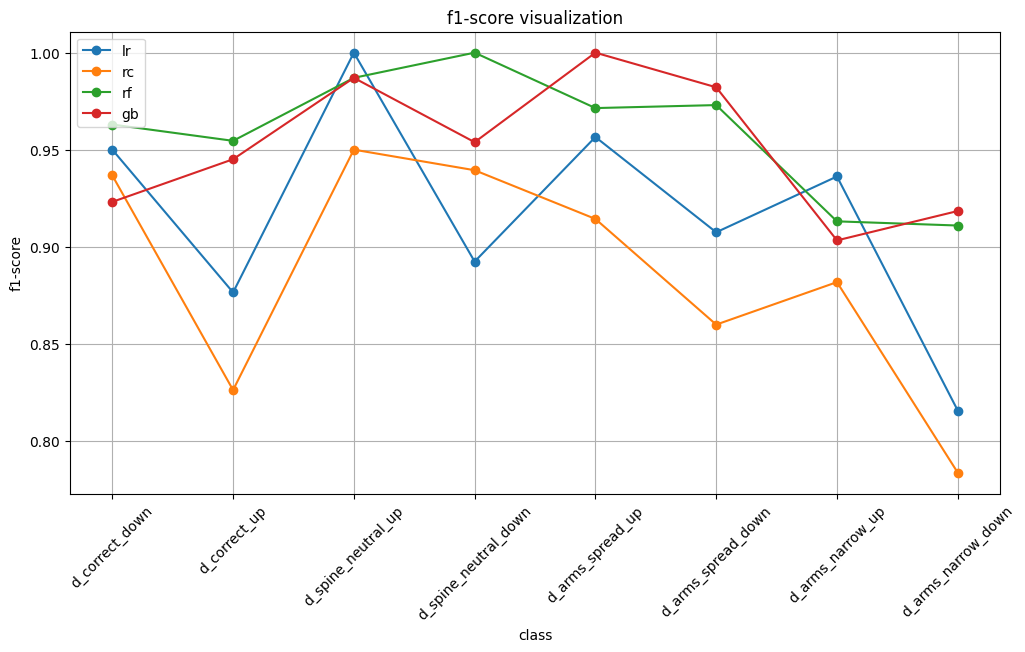

In [36]:
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

predictions = {}

for algorithm, model in fit_models.items():
    y_pred = model.predict(X_test)
    predictions[algorithm] = y_pred

metrics = ['precision', 'recall', 'f1-score']

for metric in metrics:
    plt.figure(figsize=(12, 6))
    plt.title(f'{metric} visualization')

    for algorithm, y_pred in predictions.items():
        report = classification_report(y_test, y_pred, output_dict=True)
        metric_score = [report[label][metric] for label in report if label not in ['accuracy', 'macro avg', 'weighted avg']]
        plt.plot(dl_df['class'].unique(), metric_score, label=algorithm, marker='o', linestyle='-')

    plt.xlabel('class')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

In [37]:
with open('./deadlift/deadlift_angles.pkl', 'wb') as f:
    pickle.dump(fit_models['rf'], f)

## Squat

In [38]:
X = sq_df.drop('class', axis=1)
y = sq_df['class']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}

In [41]:
fit_models = {}
for algorithm, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algorithm] = model

In [42]:
fit_models

{'lr': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression(max_iter=1000))]),
 'rc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'gb': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier', GradientBoostingClassifier())])}

In [43]:
fit_models['rc'].predict(X_test)

array(['s_caved_in_knees_up', 's_spine_neutral_down',
       's_spine_neutral_up', 's_spine_neutral_down', 's_spine_neutral_up',
       's_correct_up', 's_feet_spread_up', 's_feet_spread_down',
       's_feet_spread_down', 's_feet_spread_down',
       's_caved_in_knees_down', 's_correct_down', 's_correct_up',
       's_caved_in_knees_up', 's_correct_down', 's_feet_spread_up',
       's_feet_spread_down', 's_caved_in_knees_down',
       's_caved_in_knees_up', 's_caved_in_knees_down',
       's_caved_in_knees_down', 's_correct_up', 's_spine_neutral_down',
       's_feet_spread_up', 's_caved_in_knees_up', 's_caved_in_knees_up',
       's_feet_spread_up', 's_spine_neutral_down', 's_correct_down',
       's_spine_neutral_down', 's_caved_in_knees_down', 's_correct_up',
       's_feet_spread_up', 's_correct_down', 's_caved_in_knees_up',
       's_caved_in_knees_up', 's_correct_down', 's_caved_in_knees_up',
       's_feet_spread_up', 's_correct_up', 's_feet_spread_down',
       's_caved_in_kne

In [44]:
from sklearn.metrics import classification_report

predictions = {}

for algorithm, model in fit_models.items():
    y_pred = model.predict(X_test)
    predictions[algorithm] = y_pred 

for algorithm, y_pred in predictions.items():
    print(f'--- {algorithm} ---')
    print(classification_report(y_test, y_pred))
    print()

--- lr ---
                       precision    recall  f1-score   support

s_caved_in_knees_down       1.00      1.00      1.00        38
  s_caved_in_knees_up       1.00      1.00      1.00        41
       s_correct_down       1.00      1.00      1.00        30
         s_correct_up       1.00      0.98      0.99        42
   s_feet_spread_down       1.00      1.00      1.00        29
     s_feet_spread_up       1.00      1.00      1.00        36
 s_spine_neutral_down       0.94      1.00      0.97        30
   s_spine_neutral_up       0.97      0.94      0.95        33

             accuracy                           0.99       279
            macro avg       0.99      0.99      0.99       279
         weighted avg       0.99      0.99      0.99       279


--- rc ---
                       precision    recall  f1-score   support

s_caved_in_knees_down       1.00      1.00      1.00        38
  s_caved_in_knees_up       1.00      1.00      1.00        41
       s_correct_down       

In [45]:
metrics = {
    'accuracy': {},
    'precision': {},
    'recall': {},
    'f1-score': {}
}

for algorithm, y_pred in predictions.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    metrics['accuracy'][algorithm] = accuracy
    metrics['precision'][algorithm] = precision
    metrics['recall'][algorithm] = recall
    metrics['f1-score'][algorithm] = f1

for metric, values in metrics.items():
    print(f'--- {metric} ---')
    for algorithm, score in values.items():
        print(f'{algorithm}: {score:.4f}')

--- accuracy ---
lr: 0.9892
rc: 0.9857
rf: 0.9928
gb: 0.9857
--- precision ---
lr: 0.9896
rc: 0.9859
rf: 0.9928
gb: 0.9858
--- recall ---
lr: 0.9892
rc: 0.9857
rf: 0.9928
gb: 0.9857
--- f1-score ---
lr: 0.9893
rc: 0.9857
rf: 0.9928
gb: 0.9857


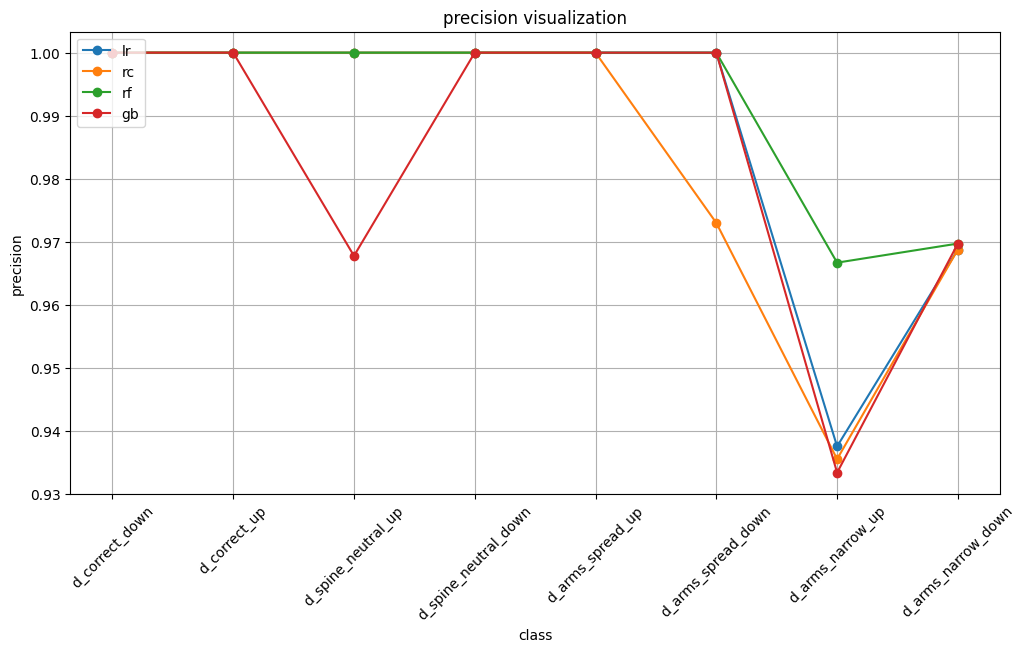

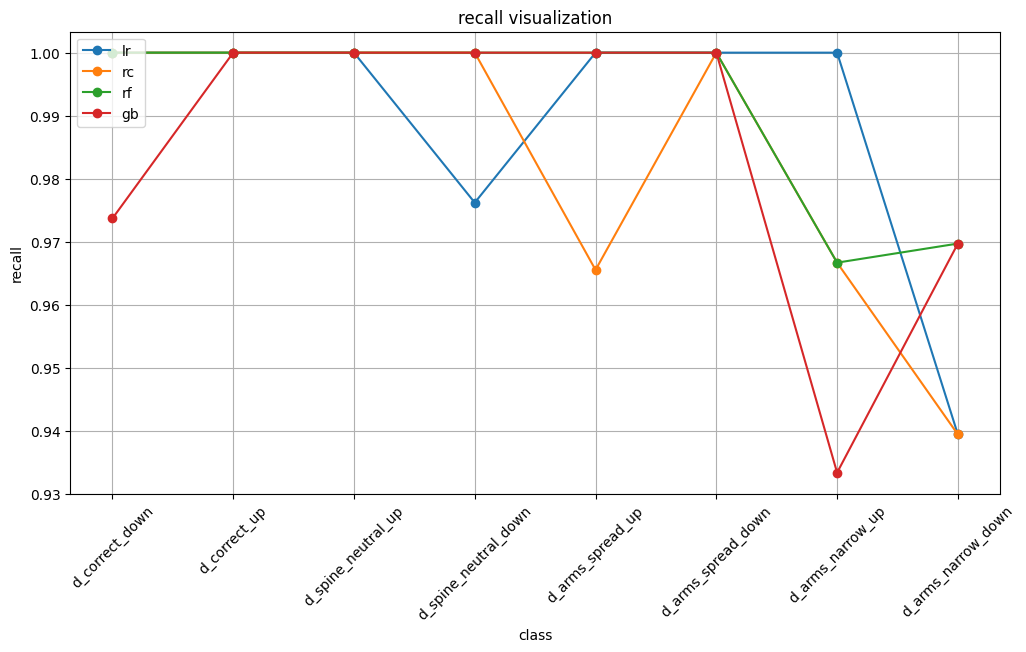

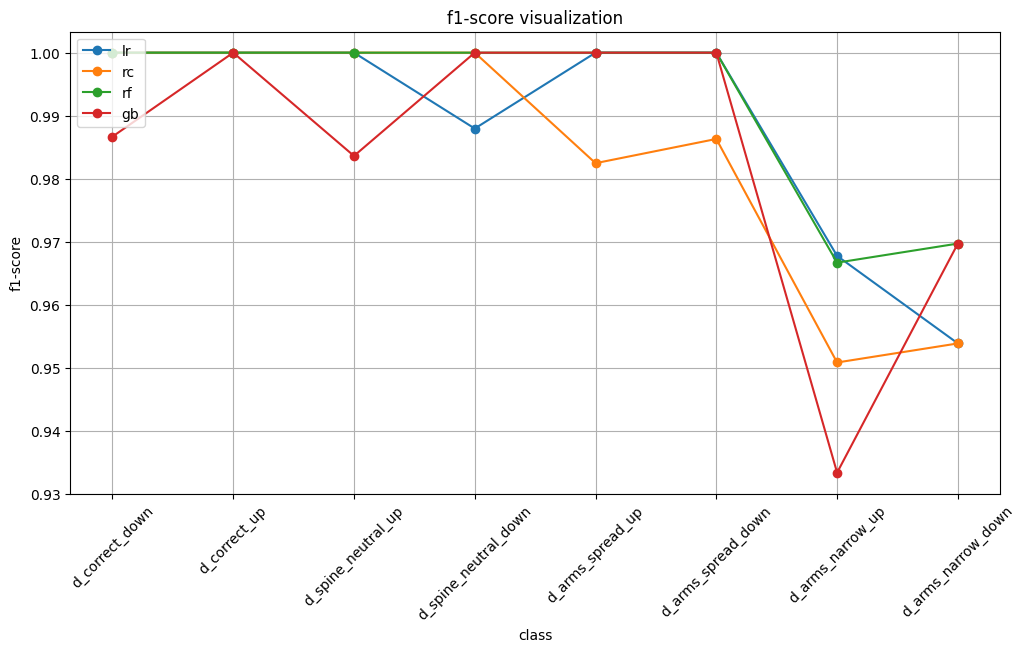

In [46]:
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

predictions = {}

for algorithm, model in fit_models.items():
    y_pred = model.predict(X_test)
    predictions[algorithm] = y_pred

metrics = ['precision', 'recall', 'f1-score']

for metric in metrics:
    plt.figure(figsize=(12, 6))
    plt.title(f'{metric} visualization')

    for algorithm, y_pred in predictions.items():
        report = classification_report(y_test, y_pred, output_dict=True)
        metric_score = [report[label][metric] for label in report if label not in ['accuracy', 'macro avg', 'weighted avg']]
        plt.plot(dl_df['class'].unique(), metric_score, label=algorithm, marker='o', linestyle='-')

    plt.xlabel('class')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

In [47]:
with open('./squat/squat_angles.pkl', 'wb') as f:
    pickle.dump(fit_models['rf'], f)